In [1]:
import numpy as np
import pandas as pd

In [2]:
rowdata = {'颜色深度':[14.23,13.2,13.16,14.37,13.24,12.07,12.43,11.79,12.37,12.04],
          '酒精浓度':[5.64,4.38,5.68,4.80,4.32,2.76,3.94,3.  ,2.12,2.6 ],
          '品种':[0,0,0,0,0,1,1,1,1,1]}

In [3]:
wine_data = pd.DataFrame(rowdata)
wine_data

,颜色深度,酒精浓度,品种
0,14.23,5.64,0
1,13.20,4.38,0
2,13.16,5.68,0
3,14.37,4.80,0
4,13.24,4.32,0
5,12.07,2.76,1
6,12.43,3.94,1
7,11.79,3.00,1
8,12.37,2.12,1
9,12.04,2.60,1


In [5]:
X = np.array(wine_data.iloc[:,:2])
X

array([[14.23,  5.64],
       [13.2 ,  4.38],
       [13.16,  5.68],
       [14.37,  4.8 ],
       [13.24,  4.32],
       [12.07,  2.76],
       [12.43,  3.94],
       [11.79,  3.  ],
       [12.37,  2.12],
       [12.04,  2.6 ]])

In [6]:
y = np.array(wine_data.iloc[:, -1])
y

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [7]:
new_data = np.array([12.8, 4.1])

In [8]:
import matplotlib.pyplot as plt

In [13]:
X[y==1,0] # X轴

array([12.07, 12.43, 11.79, 12.37, 12.04])

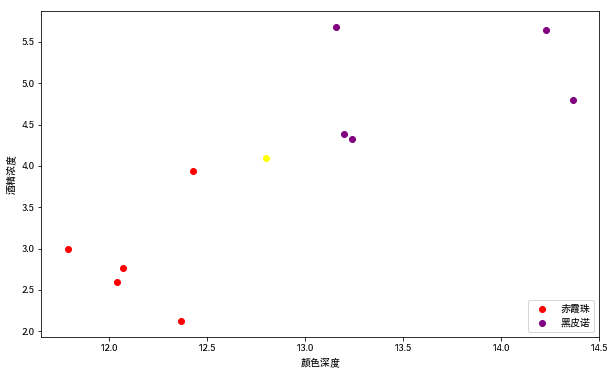

In [18]:
plt.rcParams['font.family']='Hei'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10, 6))

plt.scatter(X[y==1, 0], X[y==1, 1], color='red', label='赤霞珠')
plt.scatter(X[y==0, 0], X[y==0, 1], color='purple', label='黑皮诺')
plt.scatter(new_data[0], new_data[1], color='yellow')

plt.xlabel('颜色深度')
plt.ylabel('酒精浓度')
plt.legend(loc='lower right')

In [20]:
# 算距离
from math import sqrt

In [21]:
distance = [sqrt(np.sum((x-new_data)**2)) for x in X]
distance

[2.101547049199708,
 0.4882622246293471,
 1.6204937519163718,
 1.7189822570346662,
 0.49193495504995355,
 1.5259423318068084,
 0.4031128874149283,
 1.4933519344079622,
 2.026153992173349,
 1.6815469068687918]

In [22]:
# 找邻居
sort_dist = np.argsort(distance)
sort_dist

array([6, 1, 4, 7, 5, 2, 9, 3, 8, 0])

In [23]:
y[sort_dist]

array([1, 0, 0, 1, 1, 0, 1, 0, 1, 0])

In [24]:
k = 3
topK = [y[i] for i in sort_dist[:k]]
topK

[1, 0, 0]

In [25]:
from collections import Counter

In [26]:
votes = Counter(topK)
votes

Counter({1: 1, 0: 2})

In [30]:
predict = votes.most_common(1)[0][0]
predict

0

In [31]:
def KNN(inx, dataset, k):
    result = []
    distance = [sqrt(np.sum(x-inx)**2) for x in np.array(dataset.iloc[:, :2])]
    sort_dist = np.argsort(distance)
    topK = [dataset.iloc[:, -1][i] for i in sort_dist[:k]]
    result.append(Counter(topK).most_common(1)[0][0])
    return result

In [32]:
KNN(new_data, wine_data, 3)

[0]

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
# 实例化
clf = KNeighborsClassifier(n_neighbors=3)
# 训练模型
clf.fit(X, y)
# 预测输出，返回预测标签
result = clf.predict([[12.8, 4.1]])
result

array([0])

In [35]:
# 模型评估，接口score返回预测的准确率
clf.score([[12.8, 4.1]], [0])

1.0

In [36]:
# 返回预测的概率
clf.predict_proba([[12.8, 4.1]])

array([[0.66666667, 0.33333333]])

In [37]:
from sklearn.datasets import load_breast_cancer

In [38]:
# 探索数据集
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [40]:
X = data.data
X.shape

(569, 30)

In [41]:
y = data.target
y.shape

(569,)

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [44]:
X_train.shape

(455, 30)

In [45]:
# 建模
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
print('score:', clf.score(X_test, y_test))

score: 0.9473684210526315


In [46]:
# 返回邻近的索引值
clf.kneighbors(X_test[[30, 20], :], return_distance=True)

(array([[20.05971038, 37.40098514, 48.14451932, 49.06864718, 51.53427231],
        [21.01760286, 23.11015624, 23.26373095, 24.20013563, 24.9002722 ]]),
 array([[356, 139, 206, 297, 210],
        [443, 144,  72, 182, 389]]))

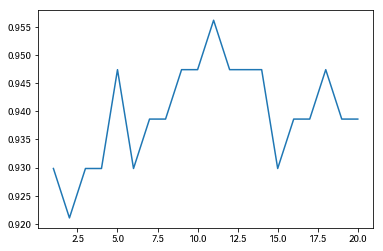

In [47]:
# 学习曲线
# 确定k的取值范围
krange = range(1, 21)
score = []

for i in krange:
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    score.append(clf.score(X_test, y_test))
    
plt.plot(krange, score)
plt.show()

In [54]:
# 交叉验证
# K折交叉验证
from sklearn.model_selection import cross_val_score as CVS

In [50]:
clf = KNeighborsClassifier(n_neighbors=5)
cvresult = CVS(clf, X_train, y_train, cv=5)
cvresult

array([0.95652174, 0.86956522, 0.96703297, 0.91111111, 0.94444444])

In [51]:
cvresult.mean()

0.9297350958220523

In [52]:
# 方差 查看模型是否稳定
cvresult.var()

0.0012584574940751854

In [53]:
# 标准差 查看模型是否稳定
cvresult.std()

0.03547474445398001

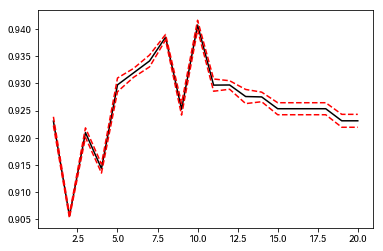

In [63]:
score = []
var_ = []
krange = range(1, 21)

for i in krange:
    clf = KNeighborsClassifier(n_neighbors=i)
    cvresult = CVS(clf, X_train, y_train, cv=5)
    score.append(cvresult.mean())
    var_.append(cvresult.var())
    
plt.plot(krange, score, color='k')
plt.plot(krange, np.array(score)+np.array(var_), c='red', linestyle='--')
plt.plot(krange, np.array(score)-np.array(var_), c='red', linestyle='--')

In [60]:
score.index(max(score))+1

10

In [64]:
# 归一化
from sklearn.preprocessing import MinMaxScaler as mms

In [65]:
data = [[-1,2],[-0.5,6],[0,10],[1,18]]
pd.DataFrame(data)

,0,1
0,-1.0,2
1,-0.5,6
2,0.0,10
3,1.0,18


In [66]:
scaler = mms()
scaler = scaler.fit(data) # 返回max min
result = scaler.transform(data)
result

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [67]:
scaler.fit_transform(data)

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

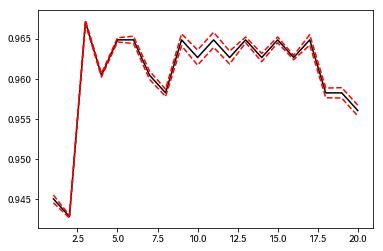

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=0)
X_train = mms().fit_transform(X_train)
X_test = mms().fit_transform(X_test)

krange = range(1, 21)
score = []
var_ = []
for i in krange:
    clf = KNeighborsClassifier(n_neighbors=i)
    cvresult = CVS(clf, X_train, y_train, cv=5)
    score.append(cvresult.mean())
    var_.append(cvresult.var())
    
plt.plot(krange, score, color='k')
plt.plot(krange, np.array(score)+np.array(var_), color='red', linestyle='--')
plt.plot(krange, np.array(score)-np.array(var_), color='red', linestyle='--')

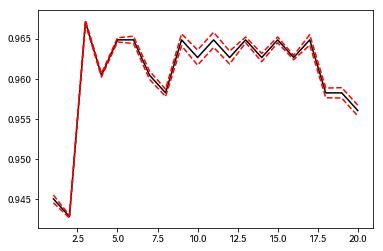

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=0)
MMS = mms().fit(X_train)
MMS_ = mms().fit(X_test)
X_train = MMS.transform(X_train)
X_test = MMS_.transform(X_test)

krange = range(1, 21)
score = []
var_ = []
for i in krange:
    clf = KNeighborsClassifier(n_neighbors=i)
    cvresult = CVS(clf, X_train, y_train, cv=5)
    score.append(cvresult.mean())
    var_.append(cvresult.var())
    
plt.plot(krange, score, color='k')
plt.plot(krange, np.array(score)+np.array(var_), color='red', linestyle='--')
plt.plot(krange, np.array(score)-np.array(var_), color='red', linestyle='--')

In [71]:
score.index(max(score))+1

3

In [70]:
# 测试模型
clf = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
clf.score(X_test, y_test)

0.9210526315789473

In [72]:
# KNN距离惩罚
clf = KNeighborsClassifier(n_neighbors=3, 
                           weights='distance').fit(X_train, y_train)
clf.score(X_test, y_test)

0.9210526315789473